\setcounter{secnumdepth}{0} 

**Alexei Marcilio**

*May 27, 2020*

# Introduction

In this analysis we look at a weekly comparison of Covid-19 cases by province. To visualize this we will use the heatmap in the seaborn library. In order to somewhat simplify the heatmap we first summarize the data by week. In addition to facilitate a comparison of each province, we scale each province's data from 0 to 1 so that the numbers from larger provinces do no obscure the overall trends of cases.

We will create a heatmap for the Canadian provinces and one for the US States.

## Methods

For 

In [1]:
# Import the necessary libraries
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import numpy as np
from sklearn import preprocessing

%matplotlib inline

# Canada

In [2]:
# Read in the data file
covid_prov = pd.read_csv('/home/alexei/ds/eme/pro/Emeritus/projects/covid19/timeseries_prov')

In [3]:
# Convert the column to datetime
covid_prov['date_report'] =  pd.to_datetime(covid_prov['date_report'],format='%d-%m-%Y')

In [4]:
# Convert the province column to string
covid_prov['Prov'] = covid_prov['province'].astype('str')

In [5]:
# Drop the old column
covid_prov.drop(columns=['province'],inplace=True)

In [6]:
# We use groupby so summarize the data by week and label each week by the first monday
covid_prov['date_report'] = pd.to_datetime(covid_prov['date_report']) - pd.to_timedelta(7, unit='d')

covid_prov = covid_prov.groupby(['Prov', pd.Grouper(key='date_report', freq='W-MON')])['cases']\
.sum().reset_index()\
.sort_values('date_report')

In [7]:
# Let's pivot the data, which is required for a heatmap, provinces on the left
# and each column is a week
covid_prov_piv = covid_prov.pivot_table(values='cases',index='Prov',columns='date_report')

In [8]:
# Update the column labels so the display is neater in seaborn
covid_prov_piv.columns = ['2020-01-20', '2020-01-27', '2020-02-03', '2020-02-10',
               '2020-02-17', '2020-02-24', '2020-03-02', '2020-03-09',
               '2020-03-16', '2020-03-23', '2020-03-30', '2020-04-06',
               '2020-04-13', '2020-04-20', '2020-04-27', '2020-05-04',
               '2020-05-11', '2020-05-18']

In [9]:
# Here we divide each value of each row (provinces) by the sum of the row. 
# This will normalize each row so that a comparison of each provice is easier.
covid_prov_piv = covid_prov_piv.div(covid_prov_piv.sum(axis=1), axis=0)

In [10]:
# We remove a couple provinces, for example, the one case on NWT.
covid_prov_piv = covid_prov_piv.loc[['Alberta', 'BC', 'Manitoba', 'NL', 'New Brunswick',
       'Nova Scotia', 'Ontario', 'PEI', 'Quebec',
       'Saskatchewan', 'Yukon'], :]


In [11]:
covid_prov_piv.index

Index(['Alberta', 'BC', 'Manitoba', 'NL', 'New Brunswick', 'Nova Scotia',
       'Ontario', 'PEI', 'Quebec', 'Saskatchewan', 'Yukon'],
      dtype='object', name='Prov')

In [12]:
# remove the early columns - there are several weeks of very little data
covid_prov_piv = covid_prov_piv.iloc[:,6:]

## Results

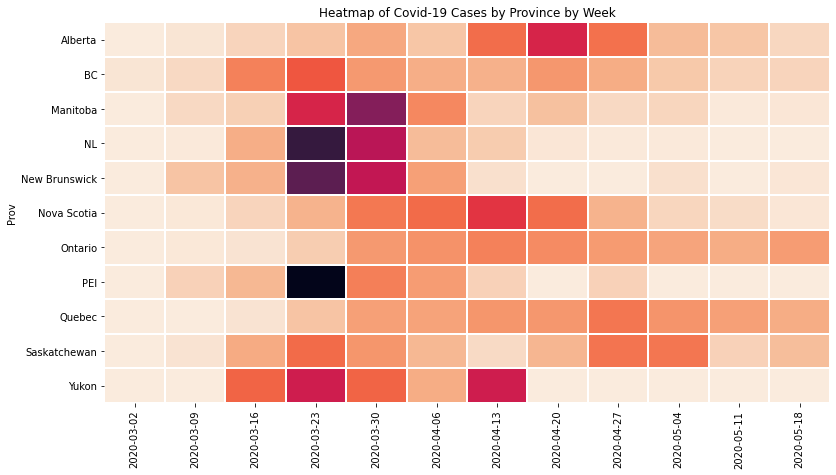

In [13]:
# Let's create the seaborn heatmap
fig, ax = plt.subplots(figsize=(13,7))
sns.heatmap(covid_prov_piv, cmap='rocket_r', linewidths=1, linecolor='white', cbar=False)
ax.set_title('Heatmap of Covid-19 Cases by Province by Week')
plt.xticks(rotation=90);


In [14]:
# We can save the heatmap to a png file to use elsewhere
fig.savefig('/home/alexei/ds/eme/pro/Emeritus/projects/covid19/CovidProvWeek.png', bbox_inches='tight')

# USA

In [15]:
# Load the data from csv file
covid_state = pd.read_csv('/home/alexei/ds/eme/pro/Emeritus/projects/covid19/usa.csv')

In [16]:
# Let's take a look at the first 5 rows
covid_state.head()

,date,state,positive
0,20200525,AK,1.0
1,20200525,AL,403.0
2,20200525,AR,107.0
3,20200525,AS,0.0
4,20200525,AZ,222.0


In [17]:
# Convert the date fields to datetime format
covid_state['date'] =  pd.to_datetime(covid_state['date'],format='%Y%m%d')

In [18]:
# Change the state to a string field
covid_state['State'] = covid_state['state'].astype('str')

In [19]:
# Drop the old column
covid_state.drop(columns=['state'],inplace=True)

In [20]:
covid_state

,date,positive,State
0,2020-05-25,1.0,AK
1,2020-05-25,403.0,AL
2,2020-05-25,107.0,AR
3,2020-05-25,0.0,AS
4,2020-05-25,222.0,AZ
...,...,...,...
4548,2020-01-26,0.0,WA
4549,2020-01-25,0.0,WA
4550,2020-01-24,0.0,WA
4551,2020-01-23,0.0,WA


In [21]:
# We use groupby so summarize the data by week and label each week by the first monday

covid_state['date'] = pd.to_datetime(covid_state['date']) - pd.to_timedelta(7, unit='d')

covid_state = covid_state.groupby(['State', pd.Grouper(key='date', freq='W-MON')])['positive']\
.sum().reset_index()\
.sort_values('date')

In [22]:
covid_state

,State,date,positive
620,WA,2020-01-20,0.0
621,WA,2020-01-27,0.0
622,WA,2020-02-03,1.0
623,WA,2020-02-10,0.0
624,WA,2020-02-17,0.0
...,...,...,...
106,DC,2020-05-18,955.0
428,NM,2020-05-18,1005.0
416,NJ,2020-05-18,7053.0
511,PR,2020-05-18,550.0


In [23]:
# Let's pivot the data, which is required for a heatmap, provinces on the left
# and each column is a week
covid_state = covid_state.pivot_table(values='positive',index='State',columns='date')

In [24]:
# Let's convert all Na to O
covid_state.fillna(0, inplace=True)

In [25]:
covid_state.columns

DatetimeIndex(['2020-01-20', '2020-01-27', '2020-02-03', '2020-02-10',
               '2020-02-17', '2020-02-24', '2020-03-02', '2020-03-09',
               '2020-03-16', '2020-03-23', '2020-03-30', '2020-04-06',
               '2020-04-13', '2020-04-20', '2020-04-27', '2020-05-04',
               '2020-05-11', '2020-05-18'],
              dtype='datetime64[ns]', name='date', freq=None)

In [26]:
# Update the column labels so the display is neater in seaborn

covid_state.columns = ['2020-01-20', '2020-01-27', '2020-02-03', '2020-02-10',
               '2020-02-17', '2020-02-24', '2020-03-02', '2020-03-09',
               '2020-03-16', '2020-03-23', '2020-03-30', '2020-04-06',
               '2020-04-13', '2020-04-20', '2020-04-27', '2020-05-04',
               '2020-05-11', '2020-05-18']

In [27]:
# Here we divide each value of each row (provinces) by the sum of the row. 
# This will normalize each row so that a comparison of each provice is easier.
covid_state = covid_state.div(covid_state.sum(axis=1), axis=0)

In [28]:
covid_state.fillna(0, inplace=True)

In [29]:
# remove the early columns - there are several weeks of very little data
# remove the early columns - there are several weeks of very little data
covid_state = covid_state.iloc[:,6:]

In [30]:
states_dict = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}

  
# Remap the values of the dataframe 
# Let's replace the index with the state names using the dictionary
covid_state.index = covid_state.index.map(states_dict)

## Results

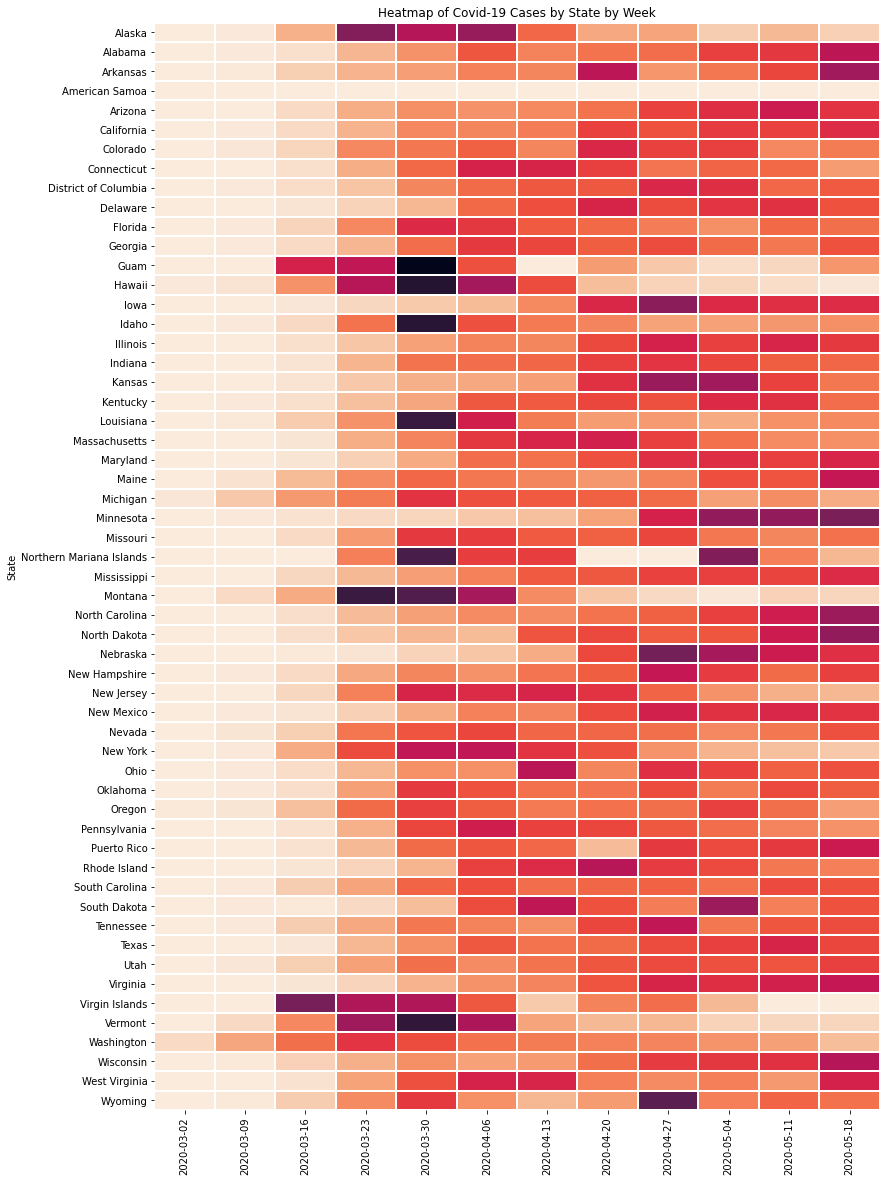

In [31]:
# Let's create the seaborn heatmap
fig, ax = plt.subplots(figsize=(13,20))
sns.heatmap(covid_state, cmap='rocket_r', linewidths=1, linecolor='white', cbar=False)
ax.set_title('Heatmap of Covid-19 Cases by State by Week')
plt.xticks(rotation=90);

In [32]:
# We can save the heatmap to a png file to use elsewhere
fig.savefig('/home/alexei/ds/eme/pro/Emeritus/projects/covid19/CovidStateWeek.png', bbox_inches='tight')

## Conclusions

The heatmaps of each country offer some interesting insights. Most provinces are over the hump in that the daily new cases is in decline. However this is not true for Ontatio and especially Quebec where new cases stubbornly have not declined.

In the USA most states have declining weekly new cases, especially the two hardest hit states, New York and New Jersey, which have shown a significant drop off in new cases. For some states however the worst seems ahead of them. For example Minnesota, North Carolina and Alabama have shown a steady increase in new cases in recent weeks.